# the goal of this is to reduce as much as we can the token counts for the model

In [7]:
import pandas as pd 
import numpy as np
import tqdm 
from utils.qwen import infer, getTokenCount
tqdm.tqdm.pandas()

In [5]:
data=pd.read_csv("02-extracted-pages.csv")

In [6]:
data.head(2)

,article_id,title,title_en,abstract_ar,abstract_en,general_field,field,authors,authors_en,publish_date,source,page1,page2
0,1,درجة اكتساب طلبة كلية التربية بجامعة السلطان ق...,The Level of Acquisition of Action Research Sk...,NaN,NaN,NaN,NaN,"[""نور النجار""]",NaN,NaN,AJP,Association of Arab Universities Journal for E...,مجلة اتحاد الجامعات العربية للتربية وعلم النفس...
1,2,القيادة الاستباقية وعلاقتها بإدارة مخاطر البيئ...,Proactive Leadership and its Relationship to S...,NaN,NaN,NaN,NaN,"[""لانا عبد المولى العنزي"", ""محمد عبود الحراحشة""]",NaN,NaN,AJP,Association of Arab Universities Journal for E...,القيادة الاستباقية وعلاقتها بإدارة مخاطر البيئ...


In [10]:
data[[f"{page}_token_count" for page in ["page1", "page2"]] ] = data[["page1", "page2"]].progress_apply(lambda x: [getTokenCount(x["page1"]), getTokenCount(x["page2"])], axis=1, result_type='expand')

100%|█████████████████████████████████████████████| 1635/1635 [00:26<00:00, 61.78it/s]


/tmp/ipykernel_8442/1803503154.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


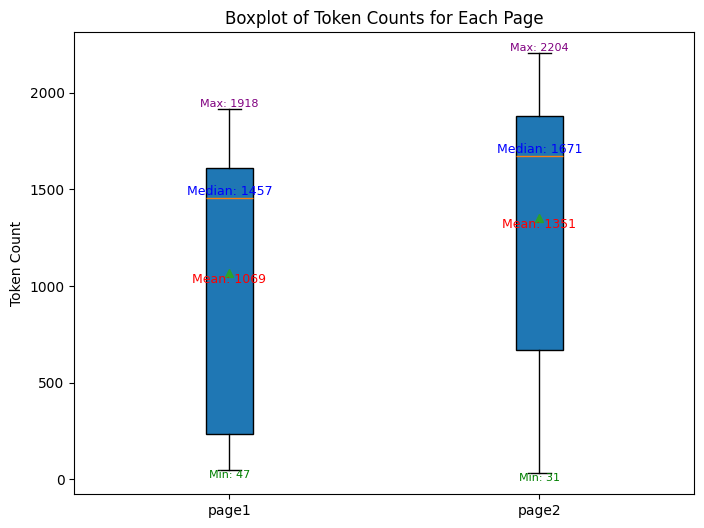

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['page1_token_count'], data['page2_token_count']],
    labels=['page1', 'page2'],
    patch_artist=True,
    showmeans=True
)

# Annotate median, mean, min, max for each box
for i, column in enumerate(['page1_token_count', 'page2_token_count']):
    col_data = data[column].dropna()
    median = col_data.median()
    mean = col_data.mean()
    min_val = col_data.min()
    max_val = col_data.max()
    plt.text(i + 1, median, f'Median: {median:.0f}', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i + 1, mean, f'Mean: {mean:.0f}', ha='center', va='top', fontsize=9, color='red')
    plt.text(i + 1, min_val, f'Min: {min_val:.0f}', ha='center', va='top', fontsize=8, color='green')
    plt.text(i + 1, max_val, f'Max: {max_val:.0f}', ha='center', va='bottom', fontsize=8, color='purple')

plt.ylabel('Token Count')
plt.title('Boxplot of Token Counts for Each Page')
plt.show()

In [13]:
data.head(1)

,article_id,title,title_en,abstract_ar,abstract_en,general_field,field,authors,authors_en,publish_date,source,page1,page2,page1_token_count,page2_token_count
0,1,درجة اكتساب طلبة كلية التربية بجامعة السلطان ق...,The Level of Acquisition of Action Research Sk...,NaN,NaN,NaN,NaN,"[""نور النجار""]",NaN,NaN,AJP,Association of Arab Universities Journal for E...,مجلة اتحاد الجامعات العربية للتربية وعلم النفس...,417,682
